In [1]:
import numpy as np
from numpy import sin,cos,pi
from scipy.linalg import *
from scipy.optimize import fsolve,root
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

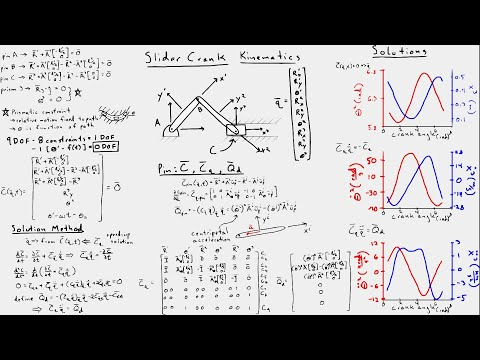

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('-A1w46iqUlE')

# Homework #7  Kinematics

**Kinematics** is the study of the geometry of motion e.g. definitions of position, velocity, and acceleration

In this notebook we will explore kinematically-driven systems where the system degrees of freedom, $n_{d}=0 = 3\times n_b -n_c$, for planar problems. $n_b$ bodies moving in a plane have $3\times n_b$ degrees of freedom and the number of constraints is $n_c$.

![Coordinate system of rigid body, https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0303.png](https://i.imgur.com/KXR6Cjp.png)
https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9780470686157/files/figs/0303.png

In the figure above, there are three position vectors, $\mathbf{r}^{i}$, $\mathbf{R}^{i}$, and $\mathbf{u}^{i}$ and two coordinate systems, $X$-$Y$ and $X^{i}$-$Y^{i}$.

The $X^{i}$-$Y^{i}$ coordinate system moves with the rigid body and the point P is always in a fixed position $\mathbf{\bar{u}}^{i}_{P}=\bar{x}^{i}_{P}\hat{i}^{i}+\bar{y}^{i}_{P}\hat{j}^{i}$ in this coordinate system. 

$\mathbf{u}^{i}_{P} = \left[ \begin{array}{cc}
\cos \theta^i & -\sin \theta^i \\
\sin \theta^i & \cos \theta^i \\
\end{array} \right]
\left[\begin{array}{c} 
\bar{x}^{i}_{P} \\ 
\bar{y}^{i}_{P}\end{array}\right]$

or

$\mathbf{u}_{P}^{i}=\mathbf{A}^{i}\mathbf{\bar{u}}^{i}_{P}$

In [3]:
def rotA(theta):
    '''This function returns a 2x2 rotation matrix to convert the 
    rotated coordinate to the global coordinate system
    input is angle in radians
        
    Parameters
    ----------
    theta : angle in radians
    
    Returns
    -------
    A : 2x2 array to rotate a coordinate system at angle theta to global x-y
    '''
    A=np.zeros((2,2))
    A=np.array([[np.cos(theta), -np.sin(theta)],
               [np.sin(theta), np.cos(theta)]])
    
    return A

In [4]:
rotA(np.pi/3)


array([[ 0.5      , -0.8660254],
       [ 0.8660254,  0.5      ]])

![Slider crank 3-body mechanism](../images/slider-crank.svg)

Figs. Slider crank mechanism and body coordinate systems.

## Computational Kinematics of Slider crank

Here you will create the computational kinematics of the slider crank in Fig. 3.35-3.36 above.

The first kinematic problem will drive the slider crank with a constraint 
$$\theta^{1} = \omega t +\theta_0$$ 

where $\omega = 150~rad/s$ and $\theta_0=\pi/6~rad$. 

Below you set up the function to return the constraint equations, 

$\mathbf{C}(\mathbf{q},t)$ = `C_slidercrank(q,t)`

In [5]:
def links(l1 = 0.075*2, l2 = 0.175*2):
    '''function to define lengths of links for bodies 2 and 3 
    in Fig. 3.35-3.36
        
    Parameters
    ----------
    l1 : length of body one, default 0.150 m
    l2 : lenght of body two, default 0.250 m
    Returns
    -------
    l1, l2 : link lengths for bodies 1 and 2 
    '''
    
    return l1,l2

In [6]:
def C_slidercrank(q,t):
    '''9 constraint equations for 9 generalized coords
       q=[R1x,R1y,a1,R2x,R2y,a2,R3x,R3y,a3]
       q=[R1,     a1,  R2,  ,a2,  R3,  ,a3]
         [0,1     2    3,4   5    6,7   8 ]
         
          1/\2
          /  \    slider-crank mechanism
         O   |3| 
        ^^^-------------
            
    Parameters
    ----------
    q : numpy array for 9 generalized coordinates for bodies 1-3 in the slider crank
        q = [q1, q2, q3]
    t : current time
    
    Returns
    -------
    C : 9 constraint equation evaluations
    '''
    l1,l2=links()
    q1 = q[0:3]
    q2 = q[3:6]
    q3 = q[6:9]

    C=np.zeros(9)
    C[0:2] = q1[0:2]+rotA(q1[2])@np.array([-l1/2, 0])
    C[2:4] = q1[0:2]-q2[0:2]+rotA(q1[2])@np.array([l1/2, 0])-rotA(q2[2])@np.array([-l2/2, 0])
    C[4:6] = q2[0:2]-q3[0:2]+rotA(q2[2])@np.array([l2/2, 0])-rotA(q3[2])@np.array([0, 0])
    C[6] = q3[1]
    C[7] = q3[2]
    C[8] = q1[2] - pi/6 - 150*t
    return C

## Problem 1

Solve for $\mathbf{q}(t=0) = [R_x^1,~R_y^1, \theta^1,~R_x^2,~R_y^2, \theta^2,~R_x^3,~R_y^3, \theta^3]$ using the given system definitions:

- $l_1 = 0.15~m$
- $l_2 = 0.25~m$
- $\theta^1(t) = 150t+\frac{\pi}{6}$

Show that `C_slidercrank(q0, 0)` $=\mathbf{0}$. 


In [7]:
## your work here

### Set up solution for $\mathbf{C}(\mathbf{q},~t)$
Next, set up the $9\times 9$ Jacobian of 

1. Set up the $\mathbf{A}_\theta$ function as `A_theta`
1. each pin $\mathbf{C_{q,~pin}}=\frac{\partial\mathbf{C_{pin}}}{\partial\mathbf{q}}$=`Cq_pin`
2. the total system: $\mathbf{C_{q}}=\frac{\partial\mathbf{C}}{\partial\mathbf{q}}$=`Cq_slidercrank`

In [8]:
def A_theta(theta):
    '''This function returns a 2x2 rotation matrix derivative 
    input is angle in radians
        
    Parameters
    ----------
    theta : angle in radians
    
    Returns
    -------
    dAda : 2x2 array derivative of `rotA`
    '''
    dAda=np.array([[-np.sin(theta), -np.cos(theta)],
                   [np.cos(theta), -np.sin(theta)]])
    return dAda

In [9]:
def Cq_pin(qi, qj, ui, uj):
    '''Jacobian of a pinned constraint for planar motion

    Parameters
    ----------
    qi : generalized coordinates of the first body, i [Rxi, Ryi, thetai]
    qj : generalized coordinates of the 2nd body, i [Rxj, Ryj, thetaj]
    ui : position of the pin the body-i coordinate system
    uj : position of the pin the body-j coordinate system
        
    Returns
    -------
    Cq_pin : 2 rows x 6 columns Jacobian of pin constraint Cpin
    '''
    
    Cq_1=np.block([np.eye(2), A_theta(qi[2])@ui[:,np.newaxis] ])
    Cq_2=np.block([-np.eye(2), -A_theta(qj[2])@uj[:,np.newaxis] ])
    Cq_pin=np.block([Cq_1, Cq_2])
    return Cq_pin

In [10]:
def Cq_slidercrank(q,t):
    '''return Jacobian of C_slidercrank(q,t) = dC/dq_i
       |dC1/dR1x dC1/dR1y ... dC9/da3 |
       |dC2/dR1x dC2/dR1y ... dC9/da3 |
       |... ..     .           ...    |
       |            .                 |
       |             .                |
       |dC9/dR1x ...         dC9/da3  |
    Parameters
    ----------
    q : numpy array for 9 generalized coordinates for bodies 1-3 in the slider crank
        q = [q1, q2, q3]
    t : current time
    Returns
    -------
    Cq : 9 rows x 9 columns Jacobian of constraints `C_slidercrank`   
    '''
    l1, l2 = links()
    q1 = q[0:3]
    q2 = q[3:6]
    q3 = q[6:9]
    
    Cq=np.zeros((9,9))
    Cq[0:2, 0:3] = Cq_pin(q1, np.array([0, 0, 0]),np.array([-l1/2, 0]),np.array([0, 0]))[0:2, 0:3]
    Cq[2:4, 0:6] = Cq_pin(q1, q2, np.array([l1/2, 0]), np.array([-l2/2, 0]))
    Cq[4:6, 3:10] = Cq_pin(q2, q3, np.array([l2/2, 0]), np.array([0, 0]))
    Cq[6:8, 7:10] = np.eye(2)
    Cq[8, 2]=1
    return Cq

### Solve for $\mathbf{q(t)}$

Now, you solve for 1 full rotation of the driven crank. 

t= 0-360$^o$ = 0-2$\pi$/150

The solution requires an initial guess for the generalized coordinates, $\mathbf{q}$, set as `q0`. It is updated at each timestep to find the next solution. Here, you use the Jacobian of $\mathbf{C}$, $\mathbf{C_q}$, by specifying the `fprime = lambda q: Cq_slidercrank`.  

In [11]:
t = np.linspace(0, 2*pi/150)
q0 = np.array([0, 0.5, pi/6, 0, 0.5, pi/3, 0.5, 0, 0])
q = np.zeros((len(q0), len(t)))
q[:, 0] = q0
for i,tt in enumerate(t):
    q[:,i]=fsolve(lambda q: C_slidercrank(q,tt),q0,\
                    fprime= lambda q: Cq_slidercrank(q,tt)) # <-- use the Jacobian to speed up solution
    q0=q[:,i]


Now, you can create the same figures as Shabana ch 3

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0337a.png](https://i.imgur.com/YyrcJF0.png)

Fig. 3.37. Orientation of the connecting rod

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0337b.png](https://i.imgur.com/BpCgybm.png)

Fig. 3.37. Displacement of the slider block

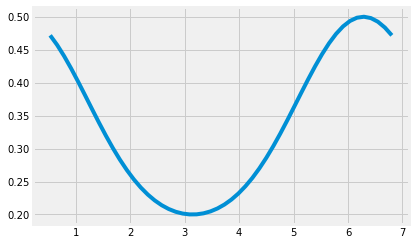

In [12]:
plt.plot(q[2,:],q[6,:])
#plt.plot(t,q[5,:]/pi*180)

## Problem 2

Recreate the displacement of the slider block graph in Fig. 3.38 from your solution.

In [13]:
## your work here

## Animate the motion for constant $\dot{\theta}^1$

Next, you animate the motion of the system. Below, you create 

1. `plot_shape` to create lines and markers to represent links and the sliding base
2. a figure that shows the path of the two link centers of mass
3.`init` to initialize the animation
4. `animate` to update the two links and sliding base
5. `FuncAnimation` to display the motion of the slidercrank system

In [14]:
def plot_shape(shape,dims,q):
    '''
    function to plot a shape based upon the shape dimensions and coordinates
    arguments:
    ----------
    shape: either 'link' or 'base',
            - the link returns two points to plot as a line
            - the base returns one point to plot as a marker
            - if neither 'link' or 'base' are chosen, then 0 is returned and warning printed 
            `choose a \'link\' or \'base\' please`
    dims: the dimensions of the shape
            - the link uses the first value as the length
            - the base ignores the `dims`
    q: generalized coordinates in the form [Rx, Ry, theta]
            - the link returns the center of the link at (Rx, Ry) and oriented at theta
            - the base returns the center at (Rx, Ry) and ignores theta
    returns:
    --------
    datax: coordinates to plot the x-positions
    datay: coordinates to plot the y-positions
            - the link returns array of length 2
            - the base returns array of length 1
    
    '''

    if shape=='link':
        left = rotA(q[2])@np.array([-dims[0]/2, 0])
        right = rotA(q[2])@np.array([dims[0]/2, 0])
        Px=q[0]+np.array([left[0], right[0]])
        Py=q[1]+np.array([left[1], right[1]])
        datax = Px
        datay = Py
        #l,= plt.plot(Px,Py,'o-')
        return datax, datay
    elif shape=='base':
        Px=q[0]
        Py=q[1]
        data = [Px, Py]
        #l,=plt.plot(Px,Py,'s',markersize=20)
        return data
    else:
        print('choose a \'link\' or \'base\' please')
        return 0


### 2. initialize the lines and coordinate system

Text(0.5, 1.0, 'Slider crank motion and paths')

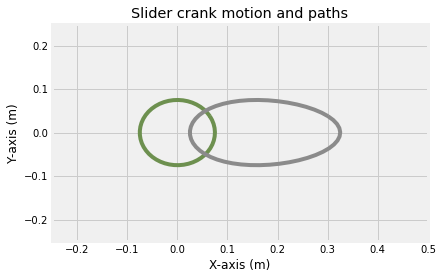

In [15]:
q1 = q[0:3, :]
q2 = q[3:6, :]
q3 = q[6:9, :]
l1, l2 = links()

fig, ax = plt.subplots()
link1, = ax.plot([], [], linewidth = 10)
link2, = ax.plot([], [], linewidth = 10)
body3, = ax.plot([], [], 's', markersize = 20)
path1, = ax.plot(q1[0, :], q1[1, :])
path2, = ax.plot(q2[0, :], q2[1, :])
ax.set_xlim((-0.25, 0.5))
ax.set_ylim((-0.25, 0.25))
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title('Slider crank motion and paths')

### 3. and 4. create your `init` and `animation` functions to update the lines on the plot
Create an initializing (`init`) function that clears the previous lines and markers

Create an animating (`animate`) function that updates the link, base, and path

In [16]:
def init():
    link1.set_data([], [])
    link2.set_data([], [])
    body3.set_data([], [])
    return (link1, link2, body3)

In [17]:
def animate(i):
    '''function that updates the line and marker data
    arguments:
    ----------
    i: index of timestep
    outputs:
    --------
    link1: the line object plotted in the above ax.plot(...)
    link2: the line object plotted in the above ax.plot(...)
    body3: the marker for the piston in the slider-crank
    '''
    l1, l2 = links()
    datax, datay = plot_shape('link', np.array([l1]), q1[:, i])
    link1.set_data(datax, datay)
    datax, datay = plot_shape('link', np.array([l2]), q2[:, i])
    link2.set_data(datax, datay)
    pinx, piny = plot_shape('base', [], q3[:,i])
    body3.set_data(pinx, piny)
    return (link1, link2, body3, )

#### 4. display the result in an HTML video

Import the `animation` and `HTML` functions. Then, create an animation (`anim`) variable using the `animation.FuncAnimation`

In [18]:
from matplotlib import animation
from IPython.display import HTML

In [19]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=range(0,len(t)), interval=50, 
                               blit=True)

In [20]:
HTML(anim.to_html5_video())

## Velocity and Acceleration

Differentiating the constraint equations, $\mathbf{Cq}=\mathbf{0}$, 

$\mathbf{C_q \dot{q}}+\mathbf{C}_t=\mathbf{0}$ (3.119)

where 

$\mathbf{C}_t = \left[\frac{\partial C_1}{\partial t} \frac{\partial C_2}{\partial t}
... \frac{\partial C_n}{\partial t}\right]^T$ (3.120)

Solve for velocity $\mathbf{\dot{q}_i}$  as such

$\mathbf{C_q \dot{q}}=-\mathbf{C}_t$ (3.121)

Differentiating $\mathbf{Cq}=\mathbf{0}$ twice leads to the acceleration equation

$\mathbf{C_q \ddot{q}}+
\left(\mathbf{C_q \dot{q}}\right)_{\mathbf{q}}\mathbf{\dot{q}}+
2\mathbf{C}_{\mathbf{q}t}\mathbf{\dot{q}}+
\mathbf{C}_{tt}=\mathbf{0}$ (3.123)

Solve for acceleration $\mathbf{\ddot{q}}$ as such

$\mathbf{C_q \ddot{q}}=\mathbf{Q}_d$

where 

$\mathbf{Q}_d=-\left(\mathbf{C_q \dot{q}}\right)_{\mathbf{q}}\mathbf{\dot{q}}-
2\mathbf{C}_{\mathbf{q}t}\mathbf{\dot{q}}-
\mathbf{C}_{tt}$

For the current slider crank system, 

$\mathbf{Q}_d=
\left[\begin{array}
~(\dot{\theta}^1)^2\mathbf{A}^1\mathbf{\bar{u}}^{1}_{A}\\
(\dot{\theta}^1)^2\mathbf{A}^1\mathbf{\bar{u}}^{1}_{B}-(\dot{\theta}^2)^2\mathbf{A}^2\mathbf{\bar{u}}^{2}_{B}\\
(\dot{\theta}^2)^2\mathbf{A}^2\mathbf{\bar{u}}^{i}_{C}\\
0\\
0\\
0\end{array}\right]$

Here, you set up `vel_acc(q,t)` to return velocity and acceleration of $\mathbf{q_{i}}$ components as $\frac{d\mathbf{q}}{dt}$ and $\frac{d^2\mathbf{q}}{dt^2}$ (`dq` and `ddq`, respectively)

In [21]:
def Qd_slidercrank(q, dq, t):
    '''return slidercrank Qd = Cq@ddq

    Parameters
    ----------
    q : numpy array for 9 generalized coordinates for bodies 1-3 in the slider crank
        q = [q1, q2, q3]
    t : current time
    Returns
    -------
    Qd : 1D array with length 9     
    '''
    l1, l2 = links()
    q1 = q[0:3]
    q2 = q[3:6]
    q3 = q[6:9]
    dq1 = dq[0:3]
    dq2 = dq[3:6]
    dq3 = dq[6:9]
    
    Qd=np.zeros(9)
    Qd[0:2] = dq1[2]**2*rotA(q1[2])@np.array([-l1/2, 0])
    Qd[2:4] = dq1[2]**2*rotA(q1[2])@np.array([l1/2, 0]) -\
              dq2[2]**2*rotA(q2[2])@np.array([-l2/2, 0])
    Qd[4:6] = dq2[2]**2*rotA(q2[2])@np.array([l2/2, 0])
    Qd[6:9] = 0
    return Qd 

def Ct_slidercrank(q, t):
    '''return slidercrank partial derivative of constraints dC/dt

    Parameters
    ----------
    q : numpy array for 9 generalized coordinates for bodies 1-3 in the slider crank
        q = [q1, q2, q3]
    t : current time
    Returns
    -------
    Ct : 1D array with length 9
    '''
    Ct = np.zeros(9)
    Ct[8] = -150
    return Ct

In [22]:

t = np.linspace(0, 2*pi/150)
q0 = np.array([0, 0.5, pi/6, 0, 0.5, pi/3, 0.5, 0, 0])
q = np.zeros((len(q0), len(t)))
dq = np.zeros(q.shape)
ddq = np.zeros(q.shape)
q[:, 0] = q0
for i, ti in enumerate(t):
    q[:, i] = fsolve(lambda q: C_slidercrank(q, ti),q0,\
                    fprime= lambda q: Cq_slidercrank(q, ti)) # <-- use the Jacobian to speed up solution
    dq[:, i] = np.linalg.solve(Cq_slidercrank(q[:,i], ti), -Ct_slidercrank(q[:, i], ti))
    Qd = Qd_slidercrank(q[:, i], dq[:, i], ti)
    ddq[:, i] = np.linalg.solve(Cq_slidercrank(q[:,i], ti), Qd)
    q0=q[:, i]
    

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0338a.png](https://i.imgur.com/OAYSFvP.png)
![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0338b.png](https://i.imgur.com/bntk5qH.png)

Fig. 3.38 velocity components 

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0339a.png](https://i.imgur.com/rwaWUTT.png)
![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0339b.png](https://i.imgur.com/RKHgBSF.png)

Fig. 3.39 acceleration components 

### Recreate the plots with your solution

Here, you can plot the terms $\dot{\mathbf{q}}$ and $\ddot{\mathbf{q}}$ to compare to the Shabana solutions shown above in Figs 3.38-39. __Try plotting $\dot{\theta}^2,~\ddot{\theta}^2,~\dot{R}^3_x,~and~\ddot{R}^3_x$__

## Problem 3

Change the constraints for the slidercrank such that 

$R^4_x-f(t)=0$

where

$f(t)=0.35-0.8l^2\sin150t$

Recreate Figs. 3.43-3.48 for the slidercrank.

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0340a.png](https://i.imgur.com/qMLFflG.png)
![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0340b.png](https://i.imgur.com/TrcECmw.png)

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0341a.png](https://i.imgur.com/FDmueEx.png)
![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0341b.png](https://i.imgur.com/Bl2Gciy.png)

![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0342a.png](https://i.imgur.com/udqlLdg.png)
![https://learning.oreilly.com/library/view/computational-dynamics-3rd/9780470686157/figs/0342b.png](https://i.imgur.com/rx6paso.png)